<a href="https://colab.research.google.com/github/ola-sumbo/Hamoye-Internship/blob/master/Zindi_Predict_upscale.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import sklearn
import pandas_profiling
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, accuracy_score, roc_curve, roc_auc_score
from scipy.stats import chi2_contingency, ttest_ind
from sklearn.utils import shuffle
import time

In [3]:
from google.colab import files
uploaded = files.upload()

TypeError: ignored

In [2]:
import io
test_df= pd.read_csv('Test.csv')
test_df.head()
test_df = test_df.fillna(method='ffill')

In [ ]:
from google.colab import files
uploaded = files.upload()

In [3]:
train_df= pd.read_csv('Train.csv')
train_df.head()
train_df= train_df.fillna(method='ffill')

In [4]:
Applicant_ID = test_df['Applicant_ID']
Applicant_ID.isnull().any()

False

In [5]:
# dataset.isnull().any()
train_df.dtypes

Applicant_ID       object
form_field1       float64
form_field2       float64
form_field3       float64
form_field4       float64
form_field5       float64
form_field6       float64
form_field7       float64
form_field8       float64
form_field9       float64
form_field10      float64
form_field11      float64
form_field12      float64
form_field13      float64
form_field14        int64
form_field15      float64
form_field16      float64
form_field17      float64
form_field18      float64
form_field19      float64
form_field20      float64
form_field21      float64
form_field22      float64
form_field23      float64
form_field24      float64
form_field25      float64
form_field26      float64
form_field27      float64
form_field28      float64
form_field29      float64
form_field30      float64
form_field31      float64
form_field32      float64
form_field33      float64
form_field34      float64
form_field35      float64
form_field36      float64
form_field37      float64
form_field38

        form_field1   form_field2  ...  form_field49  form_field50
count  56000.000000  56000.000000  ...  56000.000000  5.600000e+04
mean    3491.040036      0.544571  ...      1.049399  5.933115e+05
std      188.369785      0.815713  ...      1.806667  5.697111e+06
min     2990.000000      0.000000  ...      0.000000  0.000000e+00
25%     3358.000000      0.068050  ...      0.000000  4.545195e-02
50%     3482.000000      0.260700  ...      0.000000  1.708359e-01
75%     3618.000000      0.709663  ...      1.183553  4.991325e-01
max     3900.000000     18.015050  ...     28.000000  2.307571e+08

[8 rows x 49 columns]


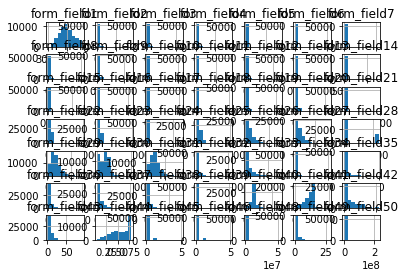

In [6]:
# summarize each variable
from matplotlib import pyplot
print(train_df.describe())
# histograms of the variables
train_df.hist()
pyplot.show()

**Data Pre processing**

In [ ]:
#list(dataset.columns.values)

Text(0.5, 1.0, 'Correlation matrix')

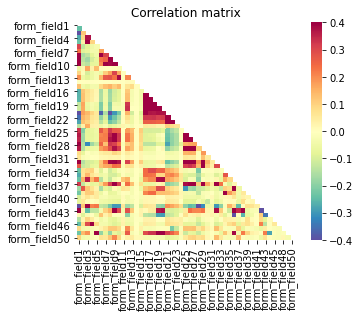

In [12]:
train_df.corr().round(3)

corrs = train_df.corr()
mask = np.zeros_like(corrs)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corrs, cmap='Spectral_r', mask=mask, square=True, vmin=-.4, vmax=.4)
plt.title('Correlation matrix')

In [13]:
CategoricalColumns = ['form_field47', 'default_status']

type(train_df)

from sklearn.preprocessing import LabelEncoder

lb_make = LabelEncoder()
train_df['form_field47_new'] = lb_make.fit_transform(train_df['form_field47'])
train_df = train_df.drop('form_field47', axis=1 )
train_df.head()

,Applicant_ID,form_field1,form_field2,form_field3,form_field4,form_field5,form_field6,form_field7,form_field8,form_field9,form_field10,form_field11,form_field12,form_field13,form_field14,form_field15,form_field16,form_field17,form_field18,form_field19,form_field20,form_field21,form_field22,form_field23,form_field24,form_field25,form_field26,form_field27,form_field28,form_field29,form_field30,form_field31,form_field32,form_field33,form_field34,form_field35,form_field36,form_field37,form_field38,form_field39,form_field40,form_field41,form_field42,form_field43,form_field44,form_field45,form_field46,form_field48,form_field49,form_field50,default_status,form_field47_new
0,Apcnt_1000000,3436.0,0.28505,1.6560,0.0,0.000,0.0,10689720.0,252072.0,4272776.0,11333126.0,4397256.0,2301324.0,7875694.0,96375139,112181765.0,1.0,1.0,1.0,3.0,3.0,134.655,NaN,NaN,134.655,4000.5,17064.0,11376.0,60.0,17064.0,5962.0,NaN,1052.0,8.0000,2.0,NaN,12.0,12.0,4.0,0.0,NaN,NaN,0.392854,2.02,0.711632,0.0,0.0,NaN,1.129518,0.044335,no,0
1,Apcnt_1000004,3456.0,0.67400,0.2342,0.0,0.000,0.0,898979.0,497531.0,9073814.0,2533168.0,244292.0,3982971.0,2141445.0,28141427,45169902.0,1.0,1.0,1.0,2.0,2.0,109.230,11385.24,14584.29,86.685,4161.0,13413.0,8942.0,304.0,13413.0,5780.0,NaN,2554.0,17.5000,0.0,0.0,16.0,24.0,8.0,0.0,NaN,NaN,0.314281,8.08,0.183584,0.0,0.0,349.805730,1.620483,0.322436,no,0
2,Apcnt_1000008,3276.0,0.53845,3.1510,0.0,6.282,0.0,956940.0,497531.0,192944.0,1079864.0,244292.0,3982971.0,0.0,16576457,22452691.0,1.0,1.0,1.0,0.0,0.0,109.230,11385.24,14584.29,86.685,1597.5,4746.0,3164.0,60.0,15696.0,5780.0,14508.0,70.0,0.6666,0.0,0.0,12.0,0.0,6.0,0.0,149.6805,NaN,0.162965,18.18,0.791136,0.0,0.0,349.805730,1.513370,0.011640,yes,0
3,Apcnt_1000012,3372.0,0.17005,0.5050,0.0,0.000,192166.0,3044703.0,385499.0,3986472.0,3621979.0,244292.0,771776.0,1186839.0,48187375,136297820.0,0.0,0.0,0.0,1.0,1.0,120.120,8580.00,0.00,85.800,1701.0,4014.0,2676.0,60.0,11679.0,5780.0,14508.0,522.0,7.8334,1.0,1.0,4.0,8.0,4.0,1.0,149.6805,NaN,0.488884,2.02,0.685168,0.0,0.0,89.940100,0.664452,0.082729,no,0
4,Apcnt_1000016,3370.0,0.77270,1.1010,0.0,0.000,1556.0,214728.0,214728.0,1284089.0,361770.0,396391.0,818456.0,511535.0,28141427,15292757.0,0.0,0.0,0.0,3.0,3.0,104.535,8360.19,10326.45,115.335,1551.0,3285.0,2190.0,60.0,19437.0,12958.0,5202.0,272.0,1.0000,0.0,0.0,24.0,2.0,24.0,0.0,150.0135,NaN,0.275000,12.12,0.438168,0.0,0.0,97.887502,1.427891,0.045630,no,0


In [14]:
from sklearn.preprocessing import LabelEncoder

lb_make = LabelEncoder()
train_df = train_df.dropna()
train_df['default_status_new'] = lb_make.fit_transform(train_df['default_status'])
train_df = train_df.drop('default_status', axis=1 )
train_df.head()

,Applicant_ID,form_field1,form_field2,form_field3,form_field4,form_field5,form_field6,form_field7,form_field8,form_field9,form_field10,form_field11,form_field12,form_field13,form_field14,form_field15,form_field16,form_field17,form_field18,form_field19,form_field20,form_field21,form_field22,form_field23,form_field24,form_field25,form_field26,form_field27,form_field28,form_field29,form_field30,form_field31,form_field32,form_field33,form_field34,form_field35,form_field36,form_field37,form_field38,form_field39,form_field40,form_field41,form_field42,form_field43,form_field44,form_field45,form_field46,form_field48,form_field49,form_field50,form_field47_new,default_status_new
7,Apcnt_1000028,3416.0,0.87020,0.0570,0.0,0.0,17505.0,186331.0,186331.0,1484813.0,326760.0,50959.0,1284089.0,5633109.0,11564970,18211813.0,0.0,0.0,0.0,1.0,1.0,124.980,8267.655,7755.0,82.680,1498.5,1734.0,1156.0,548.0,15240.0,182.0,13413.0,460.0,5.5000,0.0,1.0,10.0,6.0,12.0,0.0,153.8745,149.0190,0.137500,3.03,0.635960,0.0,0.0,155.295994,0.946074,0.128389,0,0
8,Apcnt_1000036,3376.0,0.29180,0.5586,0.0,0.0,18283.0,1105149.0,18283.0,115533.0,1557167.0,752715.0,97639.0,427511.0,11564970,18211813.0,0.0,0.0,0.0,1.0,2.0,126.495,8267.655,7755.0,126.495,1597.5,3195.0,2130.0,182.0,3741.0,1034.0,13413.0,70.0,34.8334,1.0,1.0,14.0,0.0,8.0,0.0,153.8745,102.2625,0.471427,4.04,0.410880,0.0,0.0,155.295994,0.641601,0.009990,0,0
9,Apcnt_1000040,3310.0,0.24395,0.1562,0.0,0.0,18283.0,0.0,18283.0,115533.0,0.0,208115.0,97639.0,427511.0,11564970,18211813.0,0.0,0.0,0.0,0.0,0.0,126.495,8267.655,7755.0,126.495,502.5,1278.0,852.0,182.0,9126.0,1034.0,273.0,22.0,4.1666,0.0,1.0,4.0,0.0,4.0,0.0,150.0000,102.2625,0.825000,1.01,0.800000,0.0,0.0,155.295994,0.000000,0.009990,0,1
10,Apcnt_1000044,3488.0,0.13005,0.0000,0.0,0.0,208504.0,2337890.0,208504.0,539543.0,2546783.0,208115.0,176995.0,0.0,16576457,28888307.0,0.0,0.0,0.0,0.0,0.0,68.850,6885.000,6885.0,68.850,706.5,4746.0,2860.0,670.0,9033.0,4320.0,273.0,62.0,15.3334,0.0,0.0,4.0,0.0,8.0,0.0,150.0000,102.2625,0.500005,3.03,0.794296,0.0,0.0,25.703602,0.000000,0.032549,0,0
11,Apcnt_1000056,3536.0,0.00000,0.0000,0.0,0.0,126036.0,1035518.0,566384.0,2563510.0,2509828.0,208115.0,3926177.0,854244.0,38549900,225516915.0,0.0,0.0,0.0,1.0,1.0,118.740,12198.705,6885.0,122.640,1384.5,3924.0,2616.0,4624.0,17430.0,4320.0,17430.0,182.0,2.1666,0.0,0.0,38.0,0.0,4.0,0.0,206.2950,102.2625,0.209528,19.19,0.232000,0.0,0.0,321.825569,1.000000,0.066498,0,0


In [15]:
train = train_df.drop(['Applicant_ID'], axis= 1)
train_df.Applicant_ID.unique()
train.info

<bound method DataFrame.info of        form_field1  form_field2  ...  form_field47_new  default_status_new
7           3416.0      0.87020  ...                 0                   0
8           3376.0      0.29180  ...                 0                   0
9           3310.0      0.24395  ...                 0                   1
10          3488.0      0.13005  ...                 0                   0
11          3536.0      0.00000  ...                 0                   0
...            ...          ...  ...               ...                 ...
55995       3740.0      0.01730  ...                 1                   0
55996       3360.0      2.01145  ...                 1                   1
55997       3500.0      0.76640  ...                 1                   0
55998       3280.0      0.05235  ...                 0                   0
55999       3522.0      0.46930  ...                 0                   0

[55993 rows x 51 columns]>

In [16]:
traindata, testdata = train_test_split(train, stratify = train['default_status_new'], test_size =0.4, random_state = 42 )
testdata.reset_index(drop=True, inplace = True)
traindata.reset_index(drop=True, inplace=True)

In [17]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve
from scipy.stats import boxcox 

sc = StandardScaler()
yunb = traindata['default_status_new']
Xunb = traindata.drop('default_status_new', axis =1)

In [ ]:
yunb.shape

**Model Selection**

In [18]:
# build ROC curve function to aid models analysis for unbalanced data
def createROC (models, X, y, Xte, yte):
  false_p, true_p = [], []  # output of the false positive and true positive will be in here
  for i in models.keys(): # create dictionaries of models
      models[i].fit(X, y)
      fp, tp, threshold = roc_curve(yte, models[i].predict_proba(Xte)[:,1]) # roc_curve function cmd
      true_p.append(tp)
      false_p.append(fp)
  return true_p, false_p # returns the true positive and false positive

**Cross Validation with 3 folds on LDA, Mulitinomial Naive Bayes, Random Forest, Logistic**

In [19]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn. ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_val_score

models = {'LDA': LinearDiscriminantAnalysis(),
          'MNB': MultinomialNB(),
          'RF': RandomForestClassifier(n_estimators = 100),
          'LR': LogisticRegression(C=1)}
unbalset = {}
for i in models.keys():
  scores = cross_val_score(models[i], Xunb - np.min(Xunb) + 1, yunb, cv=3)
  unbalset[i] = scores 
  print(i, scores, np.mean(scores))

LDA [0.79730333 0.79835685 0.79639221] 0.7973507976623607
MNB [0.65175462 0.56617253 0.62814788] 0.6153583451026686
RF [0.80096437 0.80058939 0.80157171] 0.8010418240051255


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


LR [0.75221002 0.75450973 0.7527237 ] 0.7531478177645189


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [20]:
# Logistic Regression did not print its output
yte = testdata['default_status_new']
Xte = testdata.drop('default_status_new', axis = 1)
Xte = sc.fit_transform(Xte)

In [21]:
tp_unbalset, fp_unbalset = createROC(models, Xunb - np.min(Xunb)+ 1, yunb, Xte - np.min(Xte) + 1, yte)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [22]:
model = LogisticRegression(C=1)
model.fit(Xunb, yunb)
predict = model.predict(Xte) # prediction of Xte to be used to test against yte

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [23]:
m = yte.to_frame()
m['default_status_new'].value_counts()

0    16913
1     5485
Name: default_status_new, dtype: int64

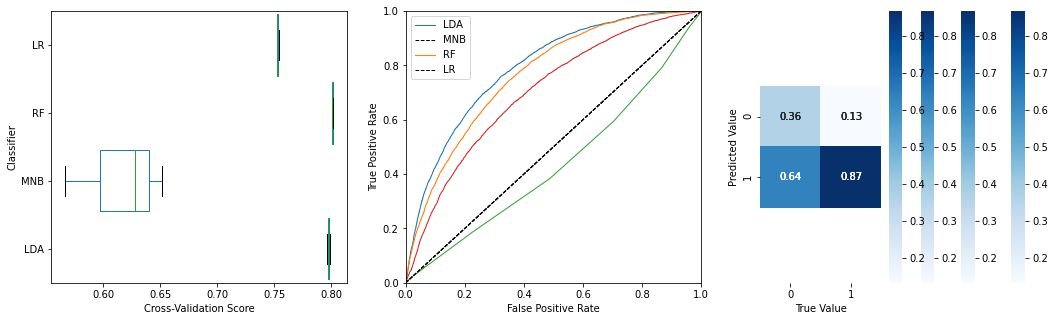

In [24]:
fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize =(18, 5))
ax = pd.DataFrame(unbalset).boxplot(widths =(0.9, 0.9, 0.9, 0.9), grid = False, vert = False, ax = axes[0])
ax.set_ylabel('Classifier')
ax.set_xlabel('Cross-Validation Score')

for i in range(0, len(tp_unbalset)):
  axes[1].plot(fp_unbalset[i], tp_unbalset[i], lw=1)
  axes[1].plot([0, 1], [0, 1], '--k', lw = 1)
  axes[1].legend(models.keys())
  axes[1].set_ylabel('True Positive Rate')
  axes[1].set_xlabel('False Positive Rate')
  axes[1].set_xlim(0,1)
  axes[1].set_ylim(0,1)

  cm = confusion_matrix(yte, predict).T
  cm = cm.astype('float')/cm.sum(axis=0)

  ax = sns.heatmap(cm, annot= True, cmap ='Blues', ax=axes[2]);
  ax.set_xlabel('True Value')
  ax.set_ylabel('Predicted Value')
  ax.axis('equal')

In [25]:
#The reason for the poor true-positive outcome is because of the imbalance dataset we will attempt to rectify this
fp, tp, threshold = roc_curve(yte, model.predict_proba(Xte)[:,1]) # obtaining the false and true positive from the testset

Text(0, 0.5, 'True Positive & False Positive Rate')

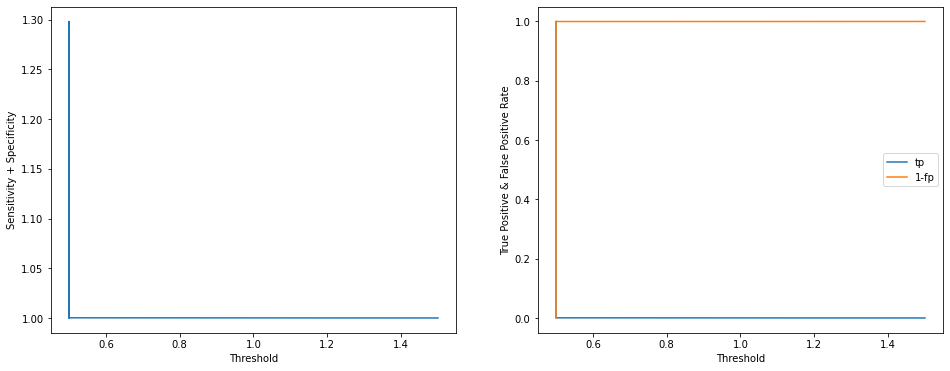

In [26]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))
ax[0].plot(threshold, tp + (1 - fp))
ax[0].set_xlabel('Threshold')
ax[0].set_ylabel('Sensitivity + Specificity')

ax[1].plot(threshold, tp, label="tp")
ax[1].plot(threshold, 1 - fp, label="1-fp")
ax[1].legend()
ax[1].set_xlabel('Threshold')
ax[1].set_ylabel('True Positive & False Positive Rate')


In [27]:
#  find the optimal threshold for the model
function = tp + (1 - fp)
index = np.argmax (function)

optimal_threshold = threshold[np.argmax(function)]
print('optimal threshold:', optimal_threshold)

optimal threshold: 0.5000000239282216


(0.0, 2.0, 2.0, 0.0)

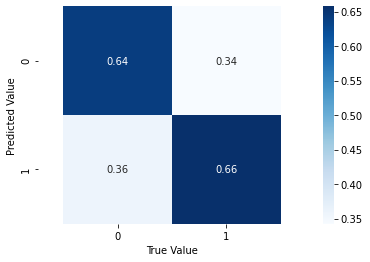

In [28]:
# Using the threshold for the model to predict 
predict = model.predict_proba(Xte)[:, 1]
predict = np.where(predict >= optimal_threshold, 1, 0)

#fig, axes = plt.subplots(figsize = (15, 6))

cm = confusion_matrix(yte, predict).T
cm = cm.astype('float')/cm.sum(axis=0)

ax = sns.heatmap(cm, annot = True, cmap ='Blues');
ax.set_xlabel('True Value')
ax.set_ylabel('Predicted Value')
ax.axis('equal')


**Part B - Balancing the training dataset and creation of a new model**

In [29]:
n_paid = traindata[traindata['default_status_new'] == 1]
y_default = traindata[traindata['default_status_new'] == 0].sample(n=len(n_paid), random_state=17) ##chosing equal amount of 0's


##creating a new dataframe for balanced set
data = y_default.append(n_paid) 

##creating the independent and dependent array
Xbal = data.drop('default_status_new', axis=1)
ybal = data['default_status_new']

In [30]:
# rescaling
numerical = Xbal.columns[(Xbal.dtypes == 'float64') | (Xbal.dtypes == 'int64')].tolist()
Xbal[numerical] = sc.fit_transform(Xbal[numerical])

In [31]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB

models = {'LDA': LinearDiscriminantAnalysis(),
          'MNB': MultinomialNB(),
          'RF': RandomForestClassifier(n_estimators=100),
          'LR': LogisticRegression(C=1)}

balset = {}
for i in models.keys():
    scores = cross_val_score(models[i], Xbal - np.min(Xbal) + 1,
                                    ybal, scoring='roc_auc', cv=3)
    balset[i] = scores
    print(i, scores, np.mean(scores))

LDA [0.81443063 0.82790196 0.82394972] 0.8220941069175113
MNB [0.78517631 0.79657974 0.79995309] 0.7939030473959635
RF [0.81205213 0.83139305 0.82397725] 0.8224741395095253


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


LR [0.8154285  0.8295776  0.82452383] 0.8231766433303318


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [33]:
model = RandomForestClassifier(n_estimators=160)
model.fit(Xbal, ybal)
predict = model.predict(Xte)

In [35]:
Xte.shape

(22398, 50)

In [ ]:
predict = model.predict(Xte)
fig, axes = plt.subplots(figsize=(8,6))
cm = confusion_matrix(yte, predict).T
cm = cm.astype('float')/cm.sum(axis=0)
ax = sns.heatmap(cm, annot=True, cmap='Blues');
ax.set_xlabel('True Label')
ax.set_ylabel('Predicted Label')
ax.axis('equal')

In [37]:
params = {'n_estimators': [50, 100, 200, 400, 600, 800]}
grid_search = GridSearchCV(RandomForestClassifier(), param_grid=params,
                                   scoring='accuracy', cv=5, n_jobs=-1)
grid_search.fit(Xbal, ybal)
print(grid_search.best_params_)
print(grid_search.best_score_)

{'n_estimators': 400}
0.7503646677322038


In [38]:
grid_search.best_estimator_.fit(Xbal, ybal)
predict = model.predict(Xte)

In [39]:
fig, axes = plt.subplots(figsize=(15,9))
cm = confusion_matrix(yte, predict).T
cm = cm.astype('float')/cm.sum(axis=0)
ax = sns.heatmap(cm, annot=True, cmap='Blues');
ax.set_xlabel('True Label')
ax.set_ylabel('Predicted Label')
ax.axis('equal')

(0.0, 2.0, 2.0, 0.0)

In [ ]:
test_df.shape

**Ensemble Model**

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_predict 
ada=AdaBoostClassifier(n_estimators=200,random_state=0,learning_rate=0.1)
result=cross_val_score(ada,Xbal,ybal,cv=10,scoring='accuracy')
cross_val_predict(ada,Xbal,ybal,cv=10)
print('The cross validated score for AdaBoost is:',result.mean())

In [ ]:
import xgboost as xg
xgboost=xg.XGBClassifier(n_estimators=160,learning_rate=0.1)
result=cross_val_score(xgboost,Xbal,ybal,cv=10,scoring='accuracy')
cross_val_predict(xgboost,Xbal,ybal,cv=10)
print('The cross validated score for XGBoost is:',result.mean())

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
model=BaggingClassifier(base_estimator=KNeighborsClassifier(n_neighbors=3),random_state=0,n_estimators=700)
model.fit(Xbal,ybal)
prediction=model.predict(Xte)
print('The accuracy for bagged KNN is:',accuracy_score(prediction,yte))
result=cross_val_score(model,X,y,cv=10,scoring='accuracy')
print('The cross validated score for bagged KNN is:',result.mean())

In [38]:
from sklearn import linear_model
from sklearn.model_selection import cross_val_predict
lasso = linear_model.Lasso()
y_pred = cross_val_predict(lasso, Xbal, ybal, cv=3)

In [58]:
final_model = lasso.fit(Xbal, ybal)
new_predictions = final_model.predict(te_no_id)
print(new_predictions)

[0.5 0.5 0.5 ... 0.5 0.5 0.5]


**Test Validation**

> Indented block



In [ ]:
# check scikit-learn version
import sklearn
print(sklearn.__version__)

In [40]:
from sklearn.preprocessing import LabelEncoder

lb_make = LabelEncoder()
test_df['form_field47_new'] = lb_make.fit_transform(test_df['form_field47'])
test = test_df.drop('form_field47', axis=1 )
test.head()

,Applicant_ID,form_field1,form_field2,form_field3,form_field4,form_field5,form_field6,form_field7,form_field8,form_field9,form_field10,form_field11,form_field12,form_field13,form_field14,form_field15,form_field16,form_field17,form_field18,form_field19,form_field20,form_field21,form_field22,form_field23,form_field24,form_field25,form_field26,form_field27,form_field28,form_field29,form_field30,form_field31,form_field32,form_field33,form_field34,form_field35,form_field36,form_field37,form_field38,form_field39,form_field40,form_field41,form_field42,form_field43,form_field44,form_field45,form_field46,form_field48,form_field49,form_field50,form_field47_new
0,Apcnt_1000032,3236.0,0.34875,10.2006,0.0000,0.0,418564.0,418564.0,418564.0,540710.0,0.0,1649749.0,5446.0,0.0,48187375,114686147.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,1086.0,6204.0,2676.0,60.0,14691.0,9794.0,NaN,238.0,1.8334,0.0,NaN,22.0,2.0,14.0,0.0,NaN,NaN,0.825000,1.01,0.800000,NaN,0.0,NaN,0.000000,0.011221,0
1,Apcnt_1000048,3284.0,1.27360,2.9606,9.0198,0.0,0.0,9858816.0,49014.0,1510098.0,18308285.0,622789.0,1025793.0,1396510.0,34694910,87479487.0,1.0,1.0,1.0,2.0,2.0,142.560,NaN,NaN,570.585,3082.5,10221.0,6814.0,60.0,11955.0,3528.0,NaN,1216.0,19.5000,3.0,NaN,30.0,18.0,14.0,2.0,NaN,18.8415,0.507694,4.04,0.623248,1.0,0.0,NaN,0.504974,0.043525,1
2,Apcnt_1000052,3284.0,0.27505,0.0600,0.0000,0.0,0.0,9858816.0,49014.0,1510098.0,0.0,118256.0,1025793.0,1396510.0,21973443,87479487.0,1.0,1.0,1.0,0.0,0.0,142.560,NaN,NaN,570.585,3082.5,10221.0,6814.0,852.0,4836.0,3528.0,NaN,1216.0,7.8334,0.0,NaN,2.0,18.0,0.0,2.0,NaN,18.8415,0.507694,0.00,0.623248,1.0,0.0,NaN,0.000000,0.043525,0
3,Apcnt_1000076,3232.0,0.28505,2.8032,0.0000,0.0,0.0,473802.0,473802.0,1724437.0,493641.0,1391064.0,1176725.0,1220293.0,16576457,87479487.0,2.0,2.0,2.0,3.0,3.0,109.005,13050.00,NaN,109.005,1414.5,4197.0,2798.0,60.0,14964.0,3528.0,NaN,248.0,9.0000,1.0,1.0,36.0,0.0,26.0,0.0,NaN,18.8415,0.916663,2.02,0.464224,1.0,0.0,90.163742,0.788809,0.104029,0
4,Apcnt_1000080,3466.0,2.09545,0.8318,2.5182,0.0,19839.0,1150662.0,1150662.0,7860523.0,5752921.0,271133.0,613064.0,4779643.0,48187375,72049802.0,0.0,0.0,0.0,3.0,3.0,139.065,469.29,469.29,15.180,2724.0,9855.0,6570.0,182.0,11679.0,5900.0,NaN,2388.0,16.6666,1.0,0.0,24.0,28.0,20.0,0.0,NaN,18.8415,0.234047,23.23,0.726688,0.0,0.0,1303.587148,1.637733,0.163124,1


In [59]:
test_no_id = test.drop('Applicant_ID', axis=1)
test_no_id = test_no_id.fillna(method='bfill')
from sklearn.preprocessing import MinMaxScaler
trans = MinMaxScaler()
te_no_id = trans.fit_transform(test_no_id)

In [60]:
import pandas
App_ID =  Applicant_ID
submission_df_1 = pd.DataFrame({
                  "Applicant_ID": App_ID, 
                  "Default_status": new_predictions})

In [61]:
submission_df_1.to_csv('submission_1.csv', index=False)

In [ ]:
test_predictions = cross_val_predict(ada, te_no_id, y)
test_predictions.shape
